<a href="https://colab.research.google.com/github/Makoto-Noda/RSNA2023/blob/main/RSNA2023_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pydicom
from pydicom.data import get_testdata_files
import plotly.express as px
from pprint import pprint
import nibabel as nib
from ipywidgets import interact

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import json
f = open("/content/drive/MyDrive/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

In [10]:
!kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f train.csv

100% 104k/104k [00:00<00:00, 1.04MB/s]
100% 104k/104k [00:00<00:00, 1.04MB/s]


In [11]:
train = pd.read_csv("train.csv")
train.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [13]:
print("Number of rows and columns:", train.shape)
print()
print('*************************************')
print()
print(train.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",train.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",train.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",train.isnull().sum())

Number of rows and columns: (3147, 15)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   patient_id             3147 non-null   int64
 1   bowel_healthy          3147 non-null   int64
 2   bowel_injury           3147 non-null   int64
 3   extravasation_healthy  3147 non-null   int64
 4   extravasation_injury   3147 non-null   int64
 5   kidney_healthy         3147 non-null   int64
 6   kidney_low             3147 non-null   int64
 7   kidney_high            3147 non-null   int64
 8   liver_healthy          3147 non-null   int64
 9   liver_low              3147 non-null   int64
 10  liver_high             3147 non-null   int64
 11  spleen_healthy         3147 non-null   int64
 12  spleen_low             3147 non-null   int64
 13  spleen_high            3147 non-null   int64
 14  any_injur

In [14]:
!kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f train_series_meta.csv

  0% 0.00/90.7k [00:00<?, ?B/s]
100% 90.7k/90.7k [00:00<00:00, 1.67MB/s]


In [16]:
train_series_meta = pd.read_csv("train_series_meta.csv")
train_series_meta.head()

,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0


In [17]:
print("Number of rows and columns:", train_series_meta.shape)
print()
print('*************************************')
print()
print(train_series_meta.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",train_series_meta.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",train_series_meta.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",train_series_meta.isnull().sum())

Number of rows and columns: (4711, 4)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        4711 non-null   int64  
 1   series_id         4711 non-null   int64  
 2   aortic_hu         4711 non-null   float64
 3   incomplete_organ  4711 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 147.3 KB
None

*************************************

Number of Unique Values:
 patient_id          3147
series_id           4711
aortic_hu            717
incomplete_organ       2
dtype: int64

*************************************

Duplicate Values:
 0

*************************************

Null Values:
 patient_id          0
series_id           0
aortic_hu           0
incomplete_organ    0
dtype: int64


In [18]:
train['bowel'] = (train.iloc[:, 1:3] == 1).idxmax(1)
train['extravasation'] = (train.iloc[:, 3:5] == 1).idxmax(1)
train['kidney'] = (train.iloc[:, 5:8] == 1).idxmax(1)
train['liver'] = (train.iloc[:, 8:11] == 1).idxmax(1)
train['spleen'] = (train.iloc[:, 11:14] == 1).idxmax(1)

train.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,bowel_healthy,extravasation_injury,kidney_low,liver_healthy,spleen_high
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_low


In [19]:
train = train.drop(columns =['bowel_healthy','bowel_injury','extravasation_healthy','extravasation_injury','kidney_healthy','kidney_low','kidney_high','liver_healthy','liver_low','liver_high',
                             'spleen_healthy','spleen_low','spleen_high'])
train.head()

,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,bowel_healthy,extravasation_injury,kidney_low,liver_healthy,spleen_high
1,10005,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
2,10007,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
3,10026,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
4,10051,1,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_low


In [20]:
train['bowel'] = train['bowel'].replace(['bowel_injury','bowel_healthy'], [0, 1])
train['extravasation'] = train['extravasation'].replace(['extravasation_injury', 'extravasation_healthy'], [0, 1])
train['kidney'] = train['kidney'].replace(['kidney_low','kidney_high','kidney_healthy'], [0, 1, 2])
train['liver'] = train['liver'].replace(['liver_low','liver_high','liver_healthy'], [0, 1, 2])
train['spleen'] = train['spleen'].replace(['spleen_low','spleen_high','spleen_healthy'], [0, 1, 2])

train.head()

,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,1,0,0,2,1
1,10005,0,1,1,2,2,2
2,10007,0,1,1,2,2,2
3,10026,0,1,1,2,2,2
4,10051,1,1,1,2,2,0


In [21]:
!kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f image_level_labels.csv

100% 347k/347k [00:00<00:00, 3.14MB/s]
100% 347k/347k [00:00<00:00, 3.12MB/s]


In [22]:
image_labels = pd.read_csv("image_level_labels.csv")
image_labels.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [23]:
print("Number of rows and columns:", image_labels.shape)
print()
print('*************************************')
print()
print(image_labels.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",image_labels.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",image_labels.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",image_labels.isnull().sum())

Number of rows and columns: (12029, 4)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       12029 non-null  int64 
 1   series_id        12029 non-null  int64 
 2   instance_number  12029 non-null  int64 
 3   injury_name      12029 non-null  object
dtypes: int64(3), object(1)
memory usage: 376.0+ KB
None

*************************************

Number of Unique Values:
 patient_id         246
series_id          330
instance_number    925
injury_name          2
dtype: int64

*************************************

Duplicate Values:
 0

*************************************

Null Values:
 patient_id         0
series_id          0
instance_number    0
injury_name        0
dtype: int64


In [24]:
!kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f train_dicom_tags.parquet

 75% 25.0M/33.5M [00:00<00:00, 41.2MB/s]
100% 33.5M/33.5M [00:00<00:00, 54.0MB/s]


In [26]:
!unzip train_dicom_tags.parquet.zip

Archive:  train_dicom_tags.parquet.zip
  inflating: train_dicom_tags.parquet  


In [27]:
train_dicom_tags = pd.read_parquet("train_dicom_tags.parquet")
train_dicom_tags.head()

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,...,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path,RescaleType
0,16,16,512,20230722,003306.881589,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1459.20]",532,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.532,1.2.840.10008.1.2.5,train_images/49954/41479/532.dcm,nan
1,16,16,512,20230722,003303.279137,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1474.40]",513,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.513,1.2.840.10008.1.2.5,train_images/49954/41479/513.dcm,nan
2,16,16,512,20230722,003343.090736,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1310.40]",718,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.718,1.2.840.10008.1.2.5,train_images/49954/41479/718.dcm,nan
3,16,16,512,20230722,003252.960345,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1520.00]",456,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.456,1.2.840.10008.1.2.5,train_images/49954/41479/456.dcm,nan
4,16,16,512,20230722,003155.059398,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1756.00]",161,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.161,1.2.840.10008.1.2.5,train_images/49954/41479/161.dcm,nan


In [28]:
print("Number of rows and columns:", train_dicom_tags.shape)
print()
print('*************************************')
print()
print(train_dicom_tags.info())
print()
print('*************************************')
print()
print("Number of Unique Values:\n",train_dicom_tags.nunique())
print()
print('*************************************')
print()
print("Duplicate Values:\n",train_dicom_tags.duplicated().sum())
print()
print('*************************************')
print()
print("Null Values:\n",train_dicom_tags.isnull().sum())

Number of rows and columns: (1510373, 35)

*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510373 entries, 0 to 1510372
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BitsAllocated               1510373 non-null  int64  
 1   BitsStored                  1510373 non-null  int64  
 2   Columns                     1510373 non-null  int64  
 3   ContentDate                 1510373 non-null  object 
 4   ContentTime                 1510373 non-null  object 
 5   FrameOfReferenceUID         1510373 non-null  object 
 6   HighBit                     1510373 non-null  int64  
 7   ImageOrientationPatient     1510373 non-null  object 
 8   ImagePositionPatient        1510373 non-null  object 
 9   InstanceNumber              1510373 non-null  int64  
 10  KVP                         1510373 non-null  float64
 11  PatientID                   15103

In [29]:
fig = px.pie(train, names=train['any_injury'].map({1: 'Patient Injured', 0: 'No Injury'}), height=500, width= 500, color_discrete_sequence=['#D3D3D3','#71797E'], title='Injuries reported in patients')
fig.update_traces(textfont_size=15)
fig.show()

In [30]:
for column in train.columns[2:4]:
    fig = px.pie(train, names=train[column].map({1: 'Healthy', 0: 'Injury'}), height=450, width= 450, color_discrete_sequence=['#E5E4E2','#71797E', '#D3D3D3'],
             title=f' Pie-Chart of {column}')
    fig.update_traces(textfont_size=15)
    fig.show()

In [31]:
for column in train.columns[4:]:
    fig = px.pie(train, names=train[column].map({2: 'Healthy', 1: 'High Level Injury', 0: 'Low Level Injury'}), height=500, width= 500, color_discrete_sequence=['#E5E4E2','#71797E', '#D3D3D3'],
             title=f' Pie-Chart of {column}')
    fig.update_traces(textfont_size=15)
    fig.show()

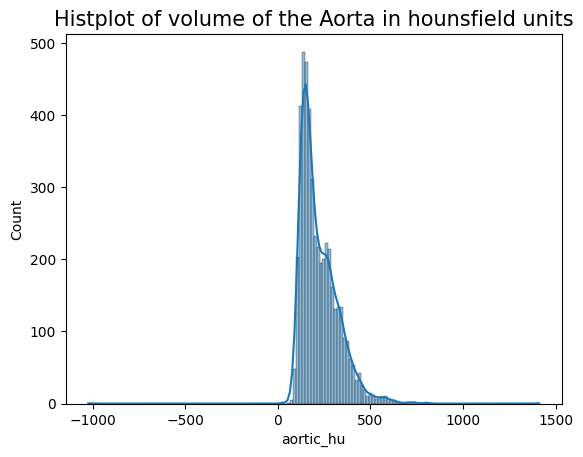

In [32]:
sns.histplot(train_series_meta['aortic_hu'],kde=True)
plt.title('Histplot of volume of the Aorta in hounsfield units',fontsize=15)
plt.show()

In [33]:
train_series_meta[train_series_meta['aortic_hu']<0]

,patient_id,series_id,aortic_hu,incomplete_organ
1742,31284,58351,-1024.0,1


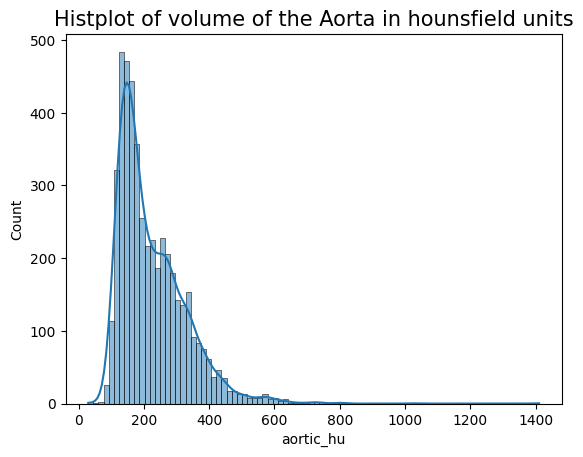

In [34]:
sns.histplot(np.abs(train_series_meta['aortic_hu']), kde=True)
plt.title('Histplot of volume of the Aorta in hounsfield units',fontsize=15)
plt.show()

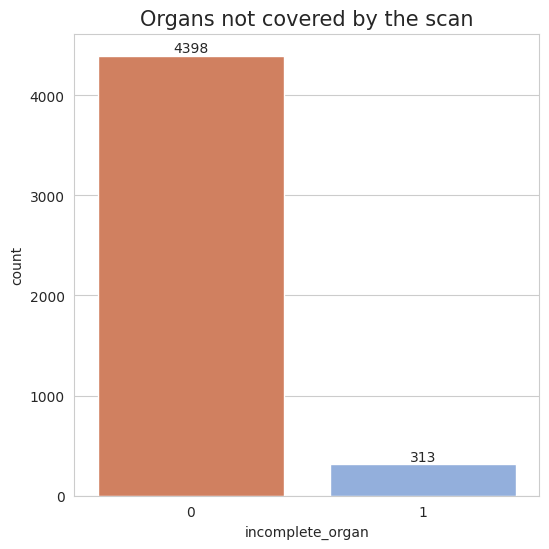

In [35]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='incomplete_organ',data=train_series_meta, palette=['#e3784d','#87ace8'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Organs not covered by the scan',fontsize=15)
plt.show()

fig = px.pie(train_series_meta, names=train_series_meta['incomplete_organ'].map({1: 'No organs covered by scan', 0: 'Organs covered by scan'}), height=550, width= 550,
             color_discrete_sequence=['#D3D3D3','#71797E'], title='Organs covered during scan')
fig.update_traces(textfont_size=15)
fig.show()

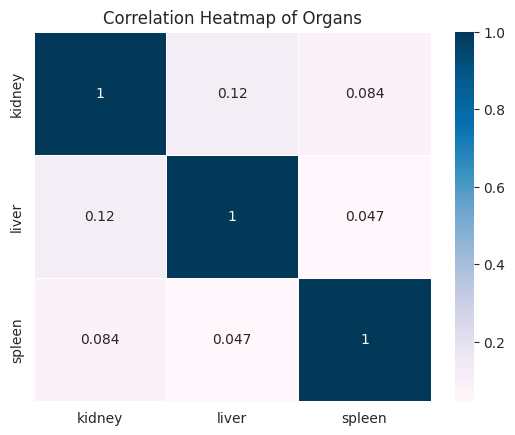

In [36]:
health_columns = ["kidney", "liver", "spleen"]

correlation_matrix = train[health_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="PuBu", linewidths=.5)
plt.title("Correlation Heatmap of Organs")
plt.show()

In [37]:
image_labels['injury_name'].unique()

array(['Active_Extravasation', 'Bowel'], dtype=object)

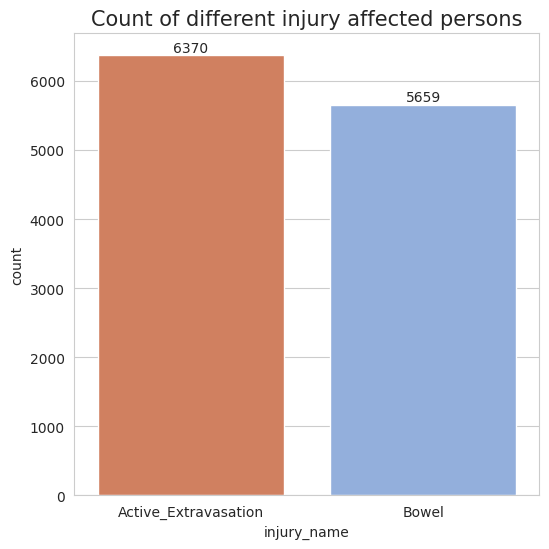

In [38]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='injury_name',data=image_labels, palette=['#e3784d','#87ace8'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of different injury affected persons',fontsize=15)
plt.show()

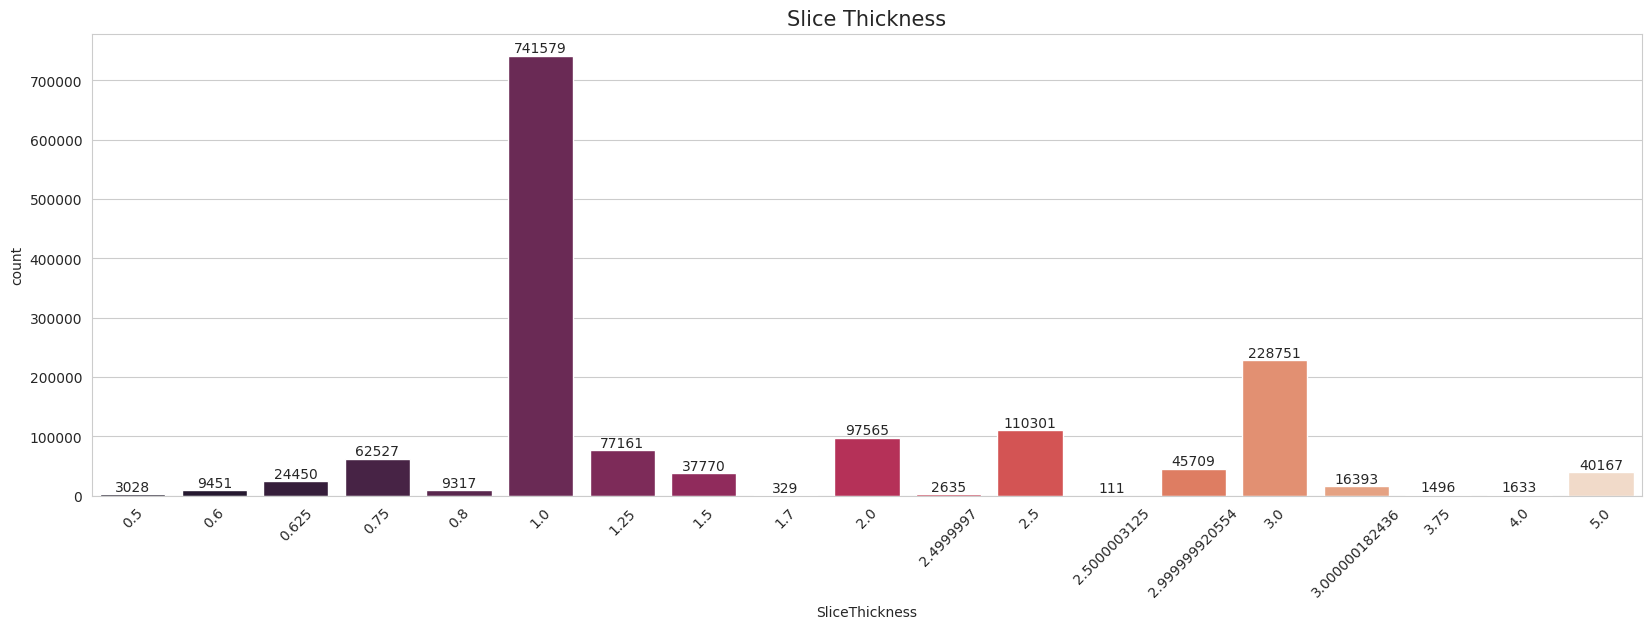

In [39]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(20,6))
ax = sns.countplot(x='SliceThickness',palette='rocket', data=train_dicom_tags)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Slice Thickness',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [41]:
!kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f /train_images/35794/42578/140.dcm

100% 241k/241k [00:00<00:00, 1.36MB/s]
100% 241k/241k [00:00<00:00, 1.35MB/s]


In [42]:
sample_image = "140.dcm"

In [43]:
def get_observation_data(path):
    '''
    Get information from the .dcm files
    '''
    dataset = pydicom.read_file(path)

    # Dictionary to store the information from the image
    observation_data = {
        "Rows" : dataset.get("Rows"),
        "Columns" : dataset.get("Columns"),
        "SOPInstanceUID" : dataset.get("SOPInstanceUID"),
        "ContentDate" : dataset.get("ContentDate"),
        "SliceThickness" : dataset.get("SliceThickness"),
        "InstanceNumber" : dataset.get("InstanceNumber"),
        "ImagePositionPatient" : dataset.get("ImagePositionPatient"),
        "ImageOrientationPatient" : dataset.get("ImageOrientationPatient"),
    }

    # String columns
    str_columns = ["SOPInstanceUID", "ContentDate",
                   "SliceThickness", "InstanceNumber"]
    for k in str_columns:
        observation_data[k] = str(dataset.get(k)) if k in dataset else None


    return observation_data

In [44]:
example = get_observation_data(sample_image)
pprint(example)

{'Columns': 512,
 'ContentDate': '20230722',
 'ImageOrientationPatient': [1, 0, 0, 0, 1, 0],
 'ImagePositionPatient': [-248.537109375, -412.537109375, 962.2],
 'InstanceNumber': '140',
 'Rows': 512,
 'SOPInstanceUID': '1.2.123.12345.1.2.3.35794.1.140',
 'SliceThickness': '3'}


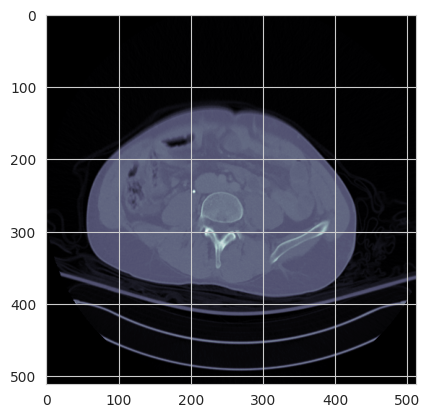

In [45]:
def plot_image(Image_path):
    ds = pydicom.dcmread(Image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()

plot_image(sample_image)

In [46]:
!kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f /segmentations/10252.nii

  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 90.6MB/s]


In [48]:
!unzip 10252.nii.zip

Archive:  10252.nii.zip
  inflating: 10252.nii               


In [49]:
sample_filename = "10252.nii"

sample_img = nib.load(sample_filename)
array = sample_img.get_fdata()
print("img shape ->", array.shape)

img shape -> (512, 512, 88)


In [50]:
print(sample_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 88)
affine: 
[[  -0.75976598    0.            0.          189.65188599]
 [   0.            0.75976598    0.         -193.36053467]
 [   0.            0.            3.         -488.5       ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  88   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.759766  0.759766  3.        0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min      

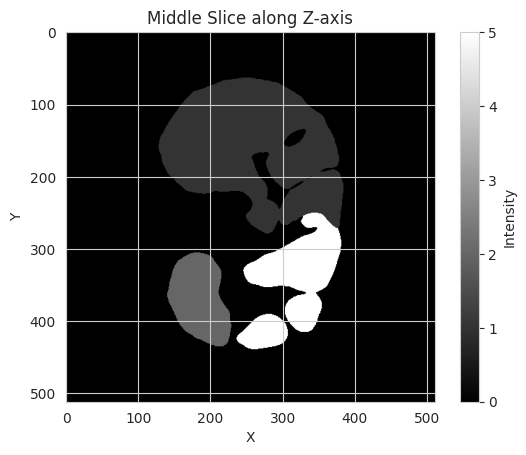

In [51]:
middle_slice = array[:,:,array.shape[2] // 2]

plt.imshow(middle_slice, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Middle Slice along Z-axis')
plt.colorbar(label='Intensity')
plt.show()

In [52]:
def show_slice(i):
    plt.imshow(array[:,:,i], cmap='gray')
    plt.show()

interact(show_slice, i=(0, array.shape[2]-1))

interactive(children=(IntSlider(value=43, description='i', max=87), Output()), _dom_classes=('widget-interact'…

<function __main__.show_slice(i)>